# Data Preparation

## Creating pandas
<blockquote>The dataset chosen for this project is Supermarket Sales from Kaggle. This data set has the sales information for three cities Mandalay, Naypyitaw and Yangoon in Myanmar. This data set Contains details of the sales for first quarter of 2019.
In this dataset Contains categorical data required for sales analysis. 
    <ol>
<li> Pandas has been imported as pd. </li>
<li> Numpy has been imported as np.</li>
<li> Matplotlib, seaborn are also imported for visualisation</li>
<li> The 'supermarket' dataset is a csv file read into pandas and stored as 'supermarket'</li>
<li> A column has been renamed from 'cogs' to 'Cost_of_goods_sold' for better understanding of the data.</li>
</ol>
    
</blockquote>


In [11]:
# Importing Pandas as pd
import pandas as pd

# Importing numpy as np
import numpy as np

# Importing seaborn and matplotlib for latter
import seaborn as sns
import matplotlib.pyplot as plt

# Reading dataset supermarket into pandas and storing it in 'supermarket'
supermarket = pd.read_csv('Desktop/UCD/supermarket.csv')

# Renaming a column 'cogs' to 'cost of goods sold'
supermarket.rename(columns = {'cogs':'Cost_of_goods_sold'},inplace = True)

# Obtaining info and shape of the data and getting first five rows of the data 'supermarket'
supermarket.info()
supermarket.shape
supermarket.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Invoice_ID     1000 non-null   object
 1   City           1000 non-null   object
 2   Customer_type  1000 non-null   object
 3   Gender         1000 non-null   object
 4   Product_line   1000 non-null   object
 5   Quantity       1000 non-null   int64 
 6   Date           1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


,Invoice_ID,City,Customer_type,Gender,Product_line,Quantity,Date
0,750-67-8428,Yangon,Member,Female,Health and beauty,7,01/05/2019
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,5,03/08/2019
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,7,03/03/2019
3,123-19-1176,Yangon,Member,Male,Health and beauty,8,1/27/2019
4,373-73-7910,Yangon,Normal,Male,Sports and travel,7,02/08/2019


# Reading another dataset
<blockquote>
    <ol>
<li> Another data set 'supermarket_payment' has been read into pandas and stored as 'Payment'.</li>
<li> This data Contains all the numeric details required for sales analysis.</li>
<li> Again Column in this data has been renamed for understanding purpose.</li>
</ol>


</blockquote>

In [2]:
# Reading another dataset supermarket_payment into pandas and storing it into 'Payment'
Payment = pd.read_csv('Desktop/UCD/supermarket_payment.csv')

# Renaming coloumn 'cogs' to 'cost of goods sold'
Payment.rename(columns = {'cogs':'Cost_of_goods_sold'},inplace = True)

# Getting info and shape and first five rows of 'Payment'
Payment.info()
Payment.shape
Payment.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Invoice_ID          1000 non-null   object 
 1   City                1000 non-null   object 
 2   Date                1000 non-null   object 
 3   Payment             1000 non-null   object 
 4   Cost_of_goods_sold  1000 non-null   float64
 5   Profit              1000 non-null   float64
 6   Unit_price          1000 non-null   float64
 7   Total               1000 non-null   float64
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


,Invoice_ID,City,Date,Payment,Cost_of_goods_sold,Profit,Unit_price,Total
0,750-67-8428,Yangon,01/05/2019,Ewallet,522.83,401.28,74.69,548.9715
1,226-31-3081,Naypyitaw,03/08/2019,Cash,76.40,149.80,15.28,80.2200
2,631-41-3108,Yangon,03/03/2019,Credit card,324.31,165.20,46.33,340.5255
3,123-19-1176,Yangon,1/27/2019,Ewallet,465.76,89.60,58.22,489.0480
4,373-73-7910,Yangon,02/08/2019,Ewallet,604.17,918.45,86.31,634.3785


# Merging dataframes
<blockquote> 
<ul>
<li>The two Dataframes has been merged using left join. By keeping Date, City and Invoice ID as common. </li>
<li> The index of the data has been set as date and sorted the index so that the data will be viewed with ascending ordered date</li>
<li> Duplicates of the data has been dropped so now the data is ready with dropped duplicates, sorted with date and ready for analysis.</li>
</ul></blockquote>

In [3]:
# Merging two datasets 'supermarket' and 'Payment' using  left join and storing the data as 'Supermarket'
Supermarket = pd.merge(supermarket, Payment, how="left", on=["Invoice_ID", "Date","City"])

# Changing the dtype of 'Date'
Supermarket['Date'] = pd.to_datetime(Supermarket['Date'])

# Setting 'Date' as index and sorting the index in ascending order
Supermarket = Supermarket.set_index('Date')
Supermarket = Supermarket.sort_index(ascending=True)

# Dropping duplicates from the data if any
Supermarket. drop_duplicates()

# Getting info and first five rows of 'Supermarket' data
Supermarket. info()
Supermarket.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2019-01-01 to 2019-03-30
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Invoice_ID          1000 non-null   object 
 1   City                1000 non-null   object 
 2   Customer_type       1000 non-null   object 
 3   Gender              1000 non-null   object 
 4   Product_line        1000 non-null   object 
 5   Quantity            1000 non-null   int64  
 6   Payment             1000 non-null   object 
 7   Cost_of_goods_sold  1000 non-null   float64
 8   Profit              1000 non-null   float64
 9   Unit_price          1000 non-null   float64
 10  Total               1000 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 93.8+ KB


,Invoice_ID,City,Customer_type,Gender,Product_line,Quantity,Payment,Cost_of_goods_sold,Profit,Unit_price,Total
Date,,,,,,,,,,,
2019-01-01,746-04-1077,Mandalay,Member,Female,Food and beverages,10,Credit card,87.45,139.80,84.63,888.615
2019-01-01,770-42-8960,Mandalay,Normal,Male,Food and beverages,8,Cash,382.56,487.76,21.12,177.408
2019-01-01,271-77-8740,Naypyitaw,Member,Female,Sports and travel,6,Ewallet,175.32,579.15,29.22,184.086
2019-01-01,651-88-7328,Yangon,Normal,Female,Fashion accessories,9,Cash,591.66,563.70,65.74,621.243
2019-01-01,556-97-7101,Naypyitaw,Normal,Female,Electronic accessories,2,Cash,126.44,545.22,63.22,132.762


# Conditional Statements
<blockquote> Products and their unit price are pulled by using the looping function and displayed each product and their prices.</blockquote>

In [4]:
# Selecting products and its price using for loop function
for index, row in Supermarket.iterrows():
    print(row["Product_line"], row["Unit_price"])

Food and beverages 84.63
Food and beverages 21.12
Sports and travel 29.22
Fashion accessories 65.74
Electronic accessories 63.22
Electronic accessories 74.71
Home and lifestyle 47.59
Sports and travel 72.61
Electronic accessories 74.22
Sports and travel 36.98
Sports and travel 27.04
Health and beauty 62.87
Sports and travel 31.67
Sports and travel 44.63
Sports and travel 42.47
Food and beverages 41.66
Electronic accessories 22.01
Fashion accessories 99.82
Fashion accessories 40.61
Health and beauty 34.21
Home and lifestyle 67.09
Health and beauty 75.88
Health and beauty 21.12
Home and lifestyle 63.15
Health and beauty 62.0
Sports and travel 93.38
Health and beauty 70.01
Health and beauty 23.03
Electronic accessories 66.65
Electronic accessories 72.17
Fashion accessories 68.71
Home and lifestyle 35.54
Health and beauty 20.97
Sports and travel 46.42
Home and lifestyle 62.65
Fashion accessories 76.06
Home and lifestyle 35.38
Health and beauty 74.69
Fashion accessories 73.96
Fashion access

# Creating a New column
<blockquote> New column has been created to calculate the profit percentage of each product sold. </blockquote>

In [5]:
# Creating a new coloumn to calculate the profit percentage 
Supermarket['Profit_percentage'] = (Supermarket['Profit'] / 
                  Supermarket['Profit'].sum()) * 100

# Displaying first five rows of the data using .head()
Supermarket.head()

,Invoice_ID,City,Customer_type,Gender,Product_line,Quantity,Payment,Cost_of_goods_sold,Profit,Unit_price,Total,Profit_percentage
Date,,,,,,,,,,,,
2019-01-01,746-04-1077,Mandalay,Member,Female,Food and beverages,10,Credit card,87.45,139.80,84.63,888.615,0.037395
2019-01-01,770-42-8960,Mandalay,Normal,Male,Food and beverages,8,Cash,382.56,487.76,21.12,177.408,0.130469
2019-01-01,271-77-8740,Naypyitaw,Member,Female,Sports and travel,6,Ewallet,175.32,579.15,29.22,184.086,0.154915
2019-01-01,651-88-7328,Yangon,Normal,Female,Fashion accessories,9,Cash,591.66,563.70,65.74,621.243,0.150782
2019-01-01,556-97-7101,Naypyitaw,Normal,Female,Electronic accessories,2,Cash,126.44,545.22,63.22,132.762,0.145839


 <blockquote>New column has been Created to count how many times the total sales value has exceeded the average level </blockquote>

In [6]:
# Getting the average of Total value and storing the value in 'Avg_Total'
Avg_total = Supermarket['Total'].mean()

# Displaying the 'Avg_total'
display(Avg_total)

# Adding a new column 'Total_caps' to tell Total value is higher than the average which is 'True' else its a 'False'
Supermarket['Total_caps'] = Supermarket['Total'].apply(lambda x: 'True' if x >= 323 else 'False')

# Counting the number of values which are higher than the average and lower 
Supermarket['Total_caps'].value_counts()

322.96674899999994

False    596
True     404
Name: Total_caps, dtype: int64

# Data analysis using Groupby functions and Graphs
<blockquote> Data analysis has been done by using .groupby() functions and graphs has been plotted accordingly using matplotlib and seaborn.
    This analysis has been done based on:
    <ul>
<li>Average profit and total sales by each product and in each city.</li>
<li>Average profit percentage per each city and product line. </li>
<li>Highest overall sales in each city and in each product line.</li>
</ul>
 and so on. This analysis is done for better understanding of the data and getting insights of the data. visualisation has been done for viewing sales higher in some factors and lower in some factors. this helps to improve and develop the business and look where the sales is down and where there is booming of sales.
    
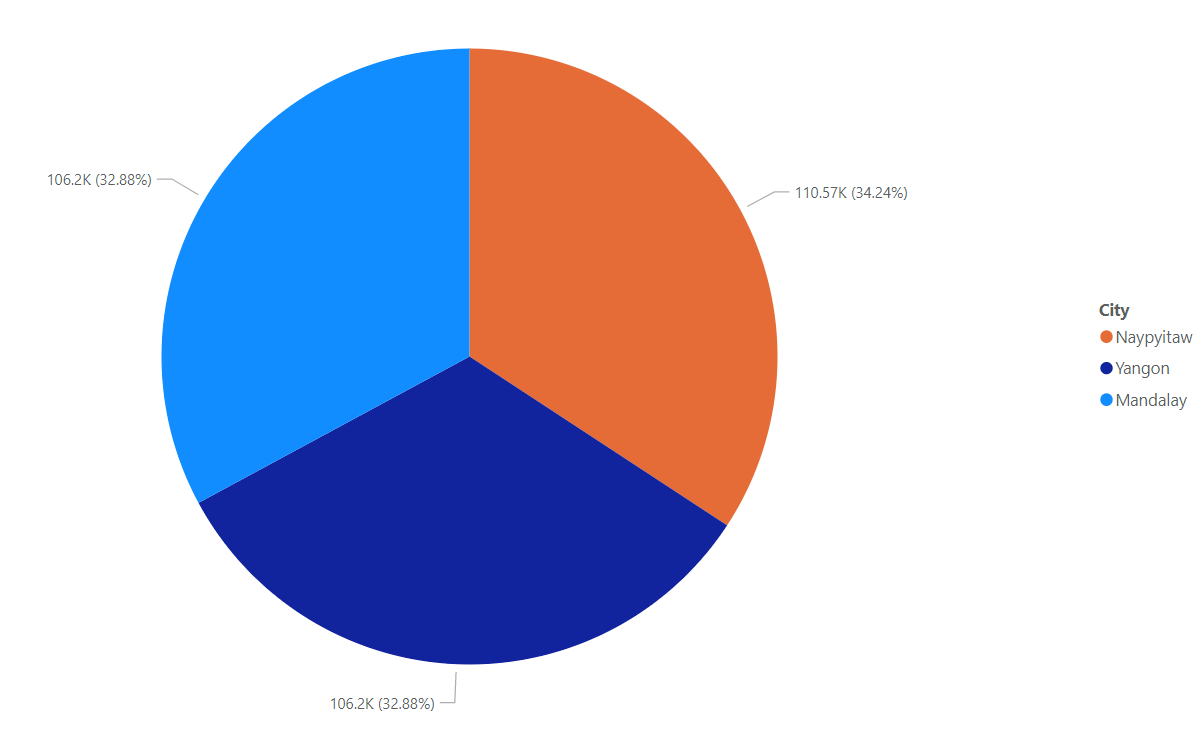
    fig: overall total sales in Each City
</blockquote>

### 1. Maximum Profit_percentage per day in each City

,Profit_percentage
,max
City,
Mandalay,0.294904
Naypyitaw,0.278172
Yangon,0.266106


<Figure size 720x432 with 0 Axes>

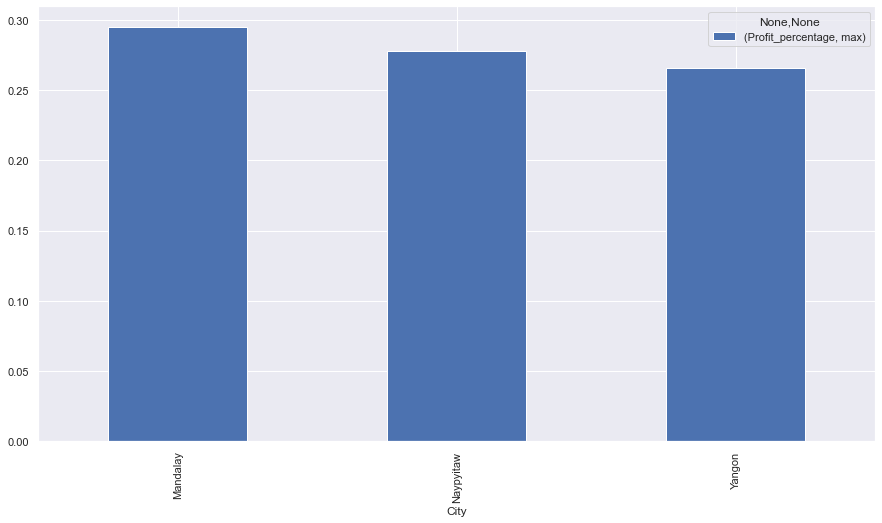

In [15]:
# Obtaining each city based on maximum Profit percentages using groupby function
City_profit= Supermarket.groupby(['City']).agg({'Profit_percentage':['max']})

# Plotting the data in stacked bar chart using matplotlib
plt.figure(figsize=(10,6))
City_profit.plot.bar()

# Displaying the 'City_profit' data 
display(City_profit)

### 2. Overall Total sales in each City 
<blockquote> Here the Overall Total sales in Each city has been obtained and plotted the results in a bar graph. </blockquote>

,Total
,sum
City,
Mandalay,106197.6720
Naypyitaw,110568.7065
Yangon,106200.3705


<Figure size 720x432 with 0 Axes>

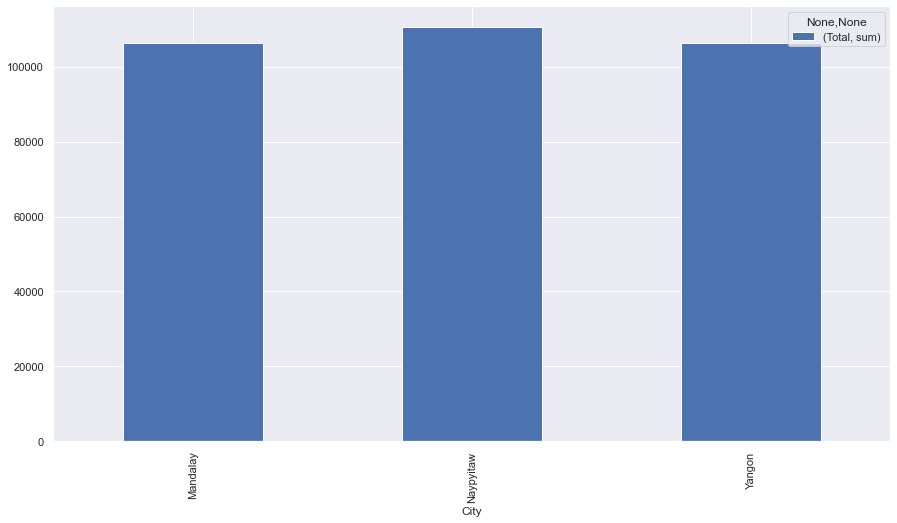

In [14]:
# Getting highest total sales in each city and storing the data in 'Highest_total_sales'
Highest_total_sales= Supermarket.groupby(['City']).agg({'Total':['sum']})

# PLotting the retrieved data in a line plot using matplotlib 
plt.figure(figsize=(10,6))
Highest_total_sales.plot.bar()
# Displaying 'Highest_total_sales'
display(Highest_total_sales)

### 3. Average Total Sales per Payment method
<blockquote> In this Code, the Average Total sales for Each mode of Payment has been obtained and plotted the results in a bar graph.</blockquote>

,Total
Payment,
Cash,326.181890
Credit card,324.009878
Ewallet,318.820600


<Figure size 720x432 with 0 Axes>

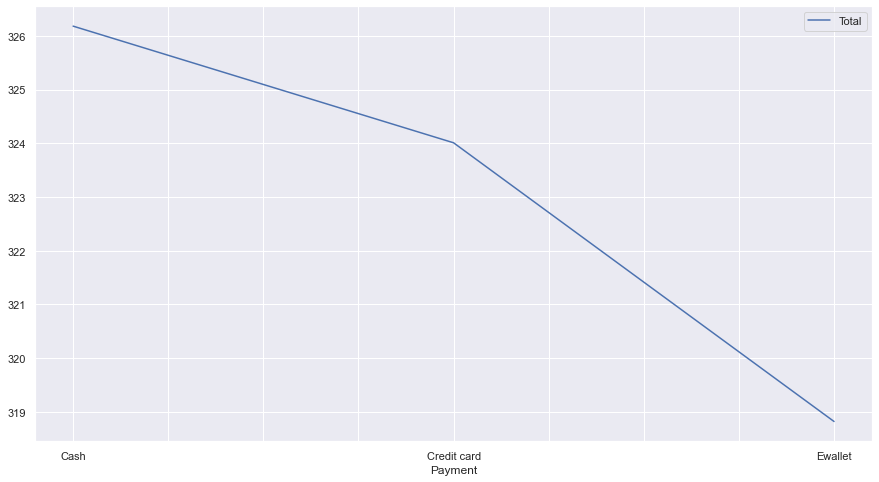

In [13]:
# Obatining Average payment and total value and storing the data in 'Payment_Average' 
Payment_Average= Supermarket.groupby(['Payment']).agg({'Total':'mean'})

# Plotting 'Payment_Average' in a bar graph using matplotlib
plt.figure(figsize=(10,6))
Payment_Average.plot.line()

# Displaying 'Payment_Average'
display(Payment_Average)


### 4. Average Total Sales per Customer Type
<blockquote> In this Bar graph we have Total sales per Customer type.</blockquote>

,Total
Customer_type,
Member,327.791305
Normal,318.122856


<Figure size 720x432 with 0 Axes>

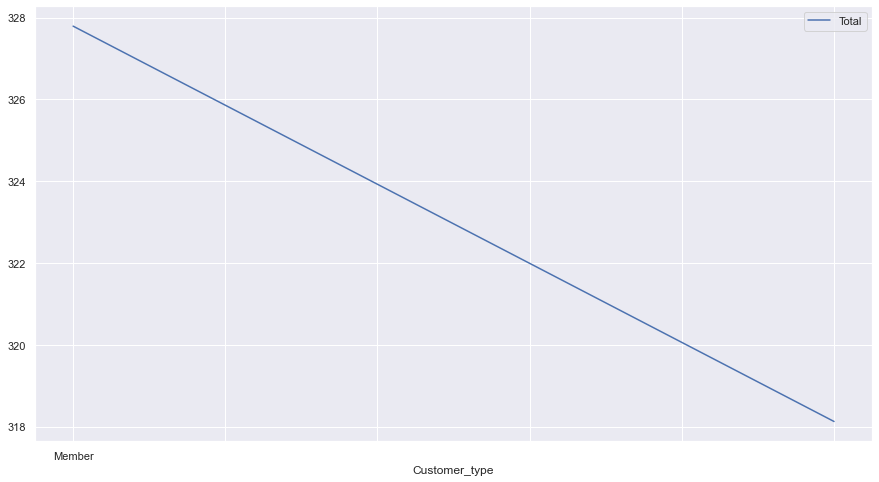

In [16]:
# Getting Customer type and the  Average of Total sales made and storing the data in 'Customer_Avg'
Customer_Avg= Supermarket.groupby(['Customer_type']).agg({'Total':'mean'})

# plotting 'Customer_Avg' in a bar graph 
plt.figure(figsize=(10,6))
Customer_Avg.plot.line()

# displaying 'Customer_Avg' data
display(Customer_Avg)

### 5. Average Cost of Goods sold per Product line 
<blockquote> In this line Graph we have the Average Cost of goods sold for each Product line </blockquote>

,Cost_of_goods_sold
Product_line,
Electronic accessories,306.801235
Fashion accessories,291.477978
Food and beverages,309.385862
Health and beauty,314.367237
Home and lifestyle,324.456937
Sports and travel,325.595060


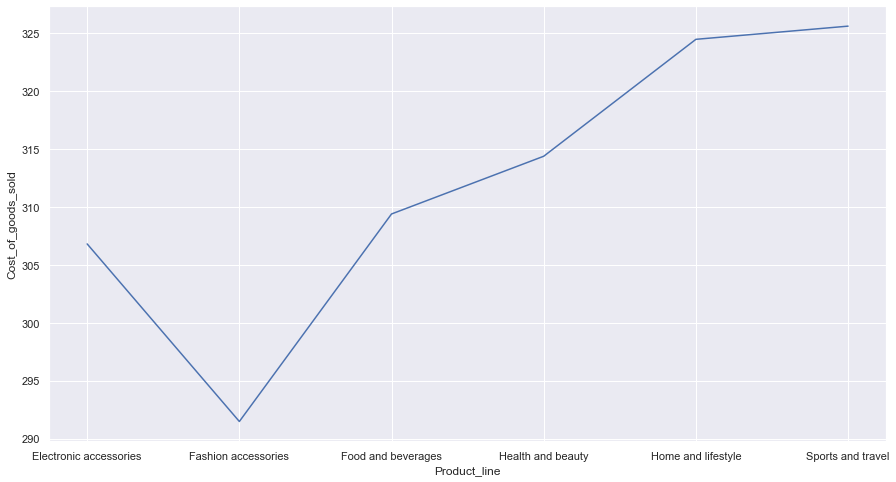

In [17]:
# Getting Average Cost of goods sold in each product line and storing the data in 'Product_cogs'
Product_cogs= Supermarket.groupby(['Product_line']).agg({'Cost_of_goods_sold':'mean'})

# plooting the data in line chart using seaborn
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=Product_cogs, x="Product_line", y="Cost_of_goods_sold")

# Displaying the 'Product_cogs'
display(Product_cogs)

### 6. Overall Profit Percentage for Each City
<blockquote> The Overall profit percentage for each city has been obtained and plotted the resulted values in a horizontal bar graph.</blockquote>

,Profit_percentage
City,
Mandalay,34.013033
Naypyitaw,32.316354
Yangon,33.670613


<Figure size 720x432 with 0 Axes>

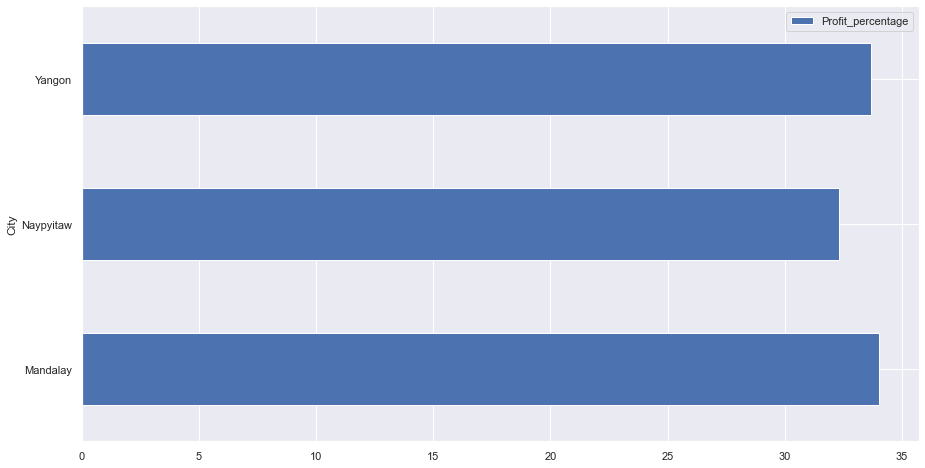

In [18]:
# Obtaining overall cost of goods sold in each city and storing the data in 'City_cogs'
City_cogs = Supermarket.groupby(['City']).agg({'Profit_percentage':'sum'})

# Plotting the data in a line graph using seaborn
plt.figure(figsize=(10,6))
City_cogs.plot(kind='barh')

# Displaying the 'City_cogs' data
display(City_cogs)

### 7. Average Profit per Product line for each City
<blockquote>In this code, we have the Average profit for each product sold in Each city and the results are visualised using line graph from seaborn</blockquote>

Profit
City      Product_line                      
Mandalay  Electronic accessories  386.596727
          Fashion accessories     332.533387
          Food and beverages      379.894600
          Health and beauty       378.514151
          Home and lifestyle      417.282000
          Sports and travel       409.001613
Naypyitaw Electronic accessories  352.292545
          Fashion accessories     409.754308
          Food and beverages      343.992273
          Health and beauty       370.852500
          Home and lifestyle      344.811333
          Sports and travel       384.457111
Yangon    Electronic accessories  351.641333
          Fashion accessories     335.741765
          Food and beverages      399.771207
          Health and beauty       373.019362
          Home and lifestyle      371.280000
          Sports and travel       386.521695

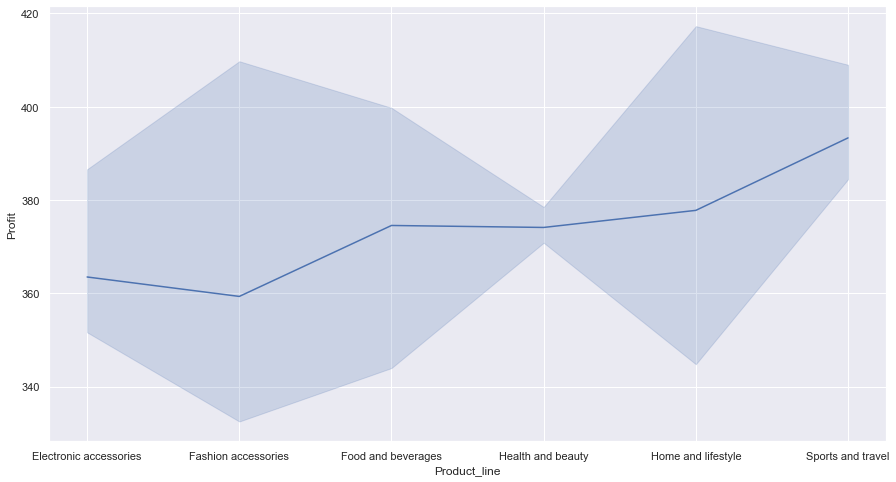

In [19]:
# Obtaing the Overall Profit for each Product sold using .sum() and storing the data in 'Prod_profit'
Prod_profit = Supermarket.groupby(['City','Product_line']).agg({'Profit':'mean'})

# Plotting 'Prod_profit' on a line chart using seaborn
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data= Prod_profit, x="Product_line", y="Profit")

# Displaying 'Profit_prod' data
display(Prod_profit)

### 8. Average Total per Product line per day
<blockquote> For each product line we have obtained Average sales made everyday and visualised the results using a scatter plot from seaborn.</blockquote>

Total
Date       Product_line                     
2019-01-01 Electronic accessories  460.91500
           Fashion accessories     621.24300
           Food and beverages      533.01150
           Health and beauty       132.02700
           Home and lifestyle      399.75600
...                                      ...
2019-03-30 Fashion accessories      85.51200
           Food and beverages      402.65400
           Health and beauty       525.95550
           Home and lifestyle      216.84600
           Sports and travel       382.73025

[455 rows x 1 columns]

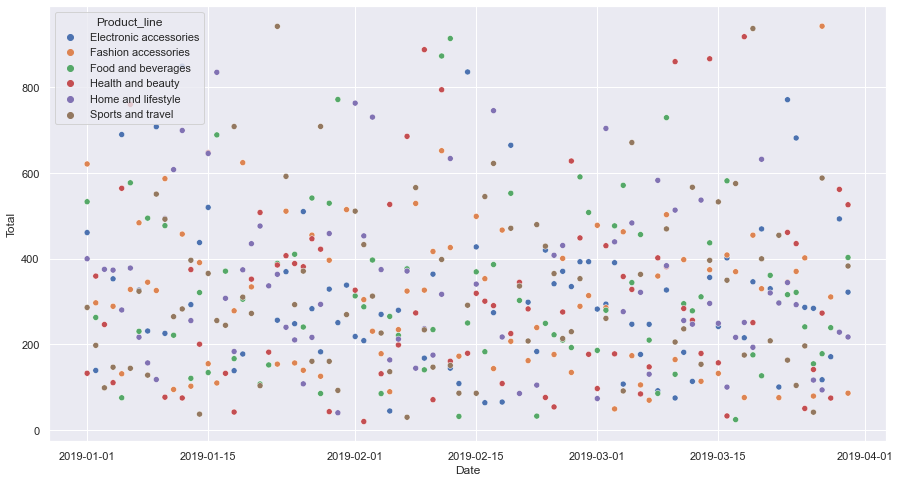

In [20]:
# Obtaining Average total sales of each products sold and each city and storing the data in 'Products_per_city_sold'
Products_per_city_sold = Supermarket.groupby(['Date','Product_line']).agg({'Total':'mean'})

# Visualising the data in a scatter plot unsing seaborn
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data= Products_per_city_sold, x="Date", y="Total", hue="Product_line")

# Displaying 'Products_per_city_sold'
display(Products_per_city_sold)

### 9. Average Profit per City per day
<blockquote> This data contains the Average profit made in each city per day and visualised the values in Scatter plot using seaborn.</blockquote>

Profit
Date       City               
2019-01-01 Mandalay   421.5200
           Naypyitaw  459.3475
           Yangon     453.8600
2019-01-02 Mandalay   229.4725
           Naypyitaw  164.6200
...                        ...
2019-03-29 Naypyitaw  468.7200
           Yangon     238.2750
2019-03-30 Mandalay   171.1400
           Naypyitaw  149.4675
           Yangon     296.2575

[263 rows x 1 columns]

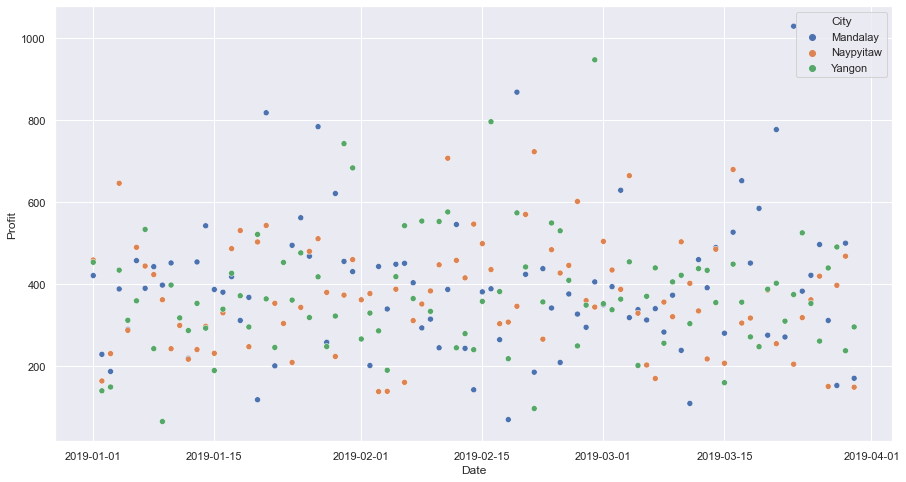

In [21]:
# Getting Average profit per City and storing the data in 'Products_sold'
Products_sold = Supermarket.groupby(['Date','City']).agg({'Profit':'mean'})

# Plotting the data in scatter plot using seaborn
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data= Products_sold, x="Date", y="Profit", hue="City")

# Displaying the 'Products_sold' data
display(Products_sold)

### 10. Overall Product sales
<blockquote> In this data we have the Overall sales made for each product and plotted the data in a heatmap which shows which product line has made more sales and which product line has made lesser sales.</blockquote>

,Quantity,Cost_of_goods_sold,Profit,Unit_price,Total,Profit_percentage
Product_line,,,,,,
Electronic accessories,971,52156.21,61737.39,9103.77,54337.5315,16.513902
Fashion accessories,902,51883.08,64373.93,10173.35,54305.8950,17.219140
Food and beverages,952,53833.14,64884.95,9745.54,56144.8440,17.355831
Health and beauty,854,47783.82,56877.49,8337.88,49193.7390,15.213945
Home and lifestyle,911,51913.11,60513.81,8850.71,53861.9130,16.186611
Sports and travel,920,54048.78,65463.45,9460.88,55122.8265,17.510571


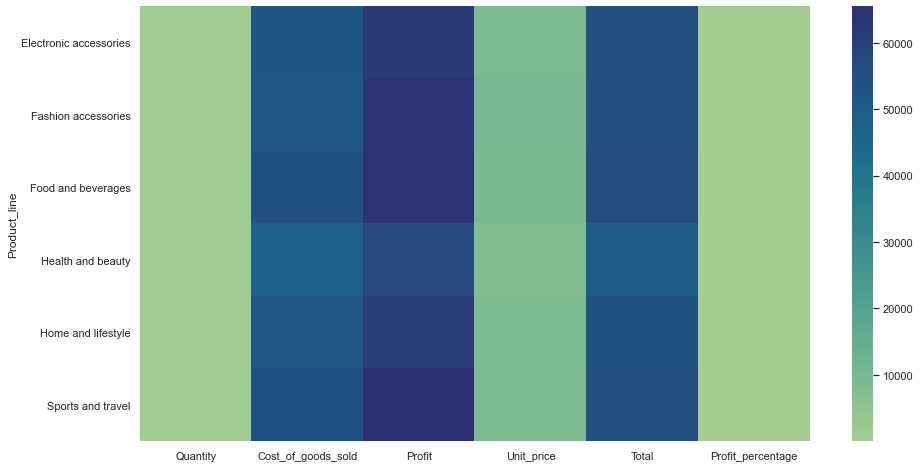

In [22]:
# Obtaining overall product line realtionships by using .sum() and storing the data in 'Product_overall'
Product_overall = Supermarket.groupby(['Product_line']).sum()

# Plotting 'Product_overall' in a heatmap using seaborn
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(Product_overall, cmap="crest")

# Displaying 'Product_overall' table for better understanding
display(Product_overall)

### 11. Total Sales Everyday
<blockquote> In this Data we have Overall Total sales made per day and visualised this data in a line plot from seaborn.</blockquote>

,Total
Date,
2019-01-01,4745.1810
2019-01-02,1945.5030
2019-01-03,2078.1285
2019-01-04,1623.6885
2019-01-05,3536.6835
...,...
2019-03-26,1962.5130
2019-03-27,2902.8195
2019-03-28,2229.4020


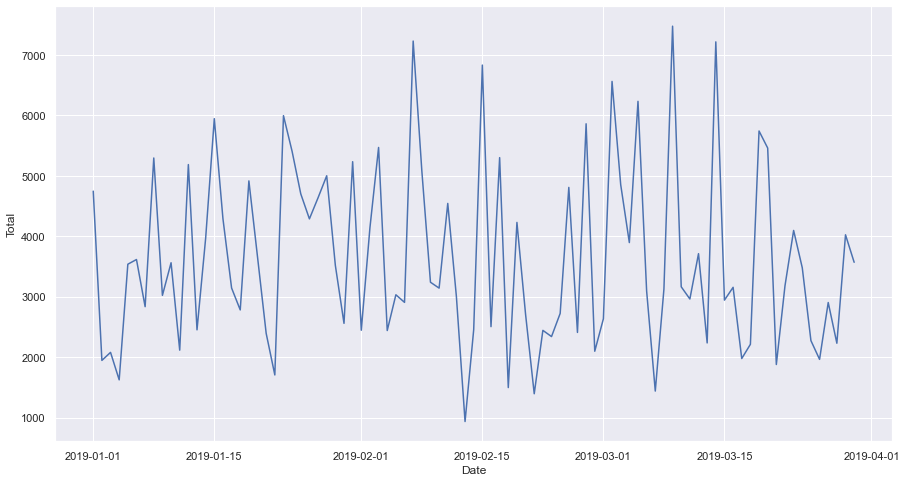

In [24]:
# Overall Sales obtained for each day and stored the data in 'Sales_overall' 
Sales_overall = Supermarket.groupby(['Date']).agg({'Total':'sum'})

# Plotting the data in line plot using seaborn
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data= Sales_overall, x="Date", y="Total")

# Displaying 'Sales_overall'
display(Sales_overall)

### 12. Overall Relationships in Supermarket
<blockquote>This Pairplot shows all the relationships possible in this sales data which helpt for further more analysis or drill down the data if required for future.</blockquote>

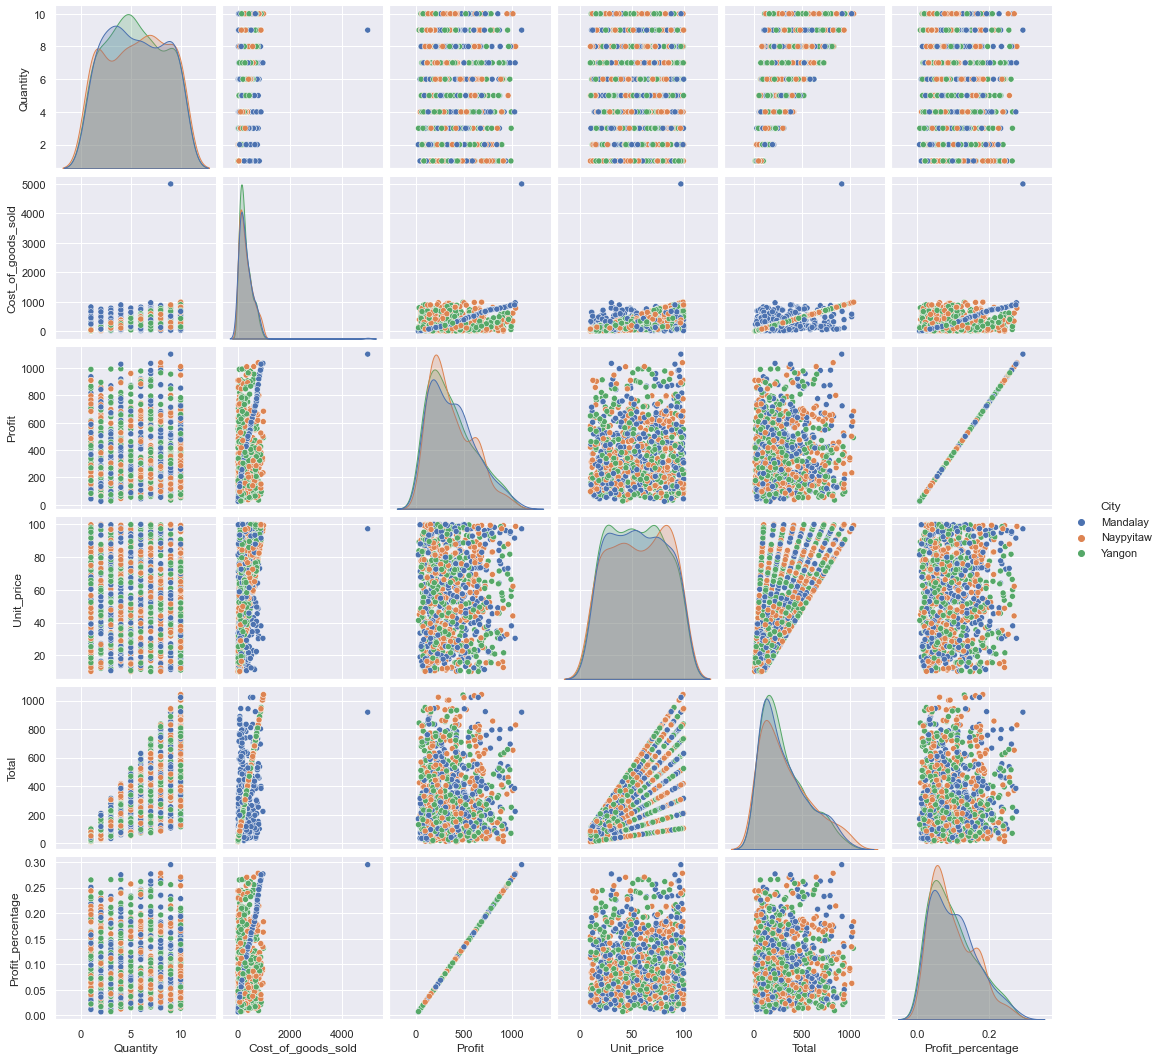

In [25]:
# Obtaining all the relationships posible of 'Supermarket'
sns.set(rc = {'figure.figsize':(15,8)})
sns.pairplot(data =Supermarket , hue='City')